In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# masuk ke directory penyimpanan dataset anda
%cd /content/drive/MyDrive/kaggle

/content/drive/MyDrive/kaggle


In [ ]:
!ls

kaggle.json			x_test.npy   x_val.npy	 y_train.npy
new-plant-diseases-dataset.zip	x_train.npy  y_test.npy  y_val.npy


In [ ]:
import numpy as np

x_train = np.load("x_train.npy")
x_val = np.load("x_val.npy")
x_test = np.load("x_test.npy")
y_train = np.load("y_train.npy")
y_val = np.load("y_val.npy")
y_test = np.load("y_test.npy")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten
import tensorflow as tf

In [ ]:
#model1 
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(250, 250, 3)),
    tf.keras.layers.MaxPooling2D(2, 2), #metode maxpooling mengambil nilai maksium pergerseran pixel yang ada
    tf.keras.layers.GlobalMaxPooling2D(), #globalmaxpooling
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

print ("Model 1 metode maxpooling")
model1.summary()

Model 1 metode maxpooling
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 global_max_pooling2d (Globa  (None, 32)               0         
 lMaxPooling2D)                                                  
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dense_1 (Dense)             (

In [ ]:
from tensorflow.keras.optimizers import Adam

model1.compile(optimizer=Adam(lr=0.001), #lr=0.001
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
N = model1.fit(x_train, y_train, 
              batch_size=10, 
              epochs=5, 
              validation_data=(x_val, y_val))

Epoch 1/5
622/622 [==============================] - 218s 349ms/step - loss: -143683.2188 - acc: 0.2560 - val_loss: -746220.3125 - val_acc: 0.2556
Epoch 2/5
622/622 [==============================] - 215s 345ms/step - loss: -4520482.5000 - acc: 0.2557 - val_loss: -11494039.0000 - val_acc: 0.2556
Epoch 3/5
622/622 [==============================] - 212s 341ms/step - loss: -27993604.0000 - acc: 0.2557 - val_loss: -51261364.0000 - val_acc: 0.2556
Epoch 4/5
622/622 [==============================] - 212s 341ms/step - loss: -90684088.0000 - acc: 0.2557 - val_loss: -140790064.0000 - val_acc: 0.2556
Epoch 5/5
622/622 [==============================] - 213s 343ms/step - loss: -212048096.0000 - acc: 0.2557 - val_loss: -297199264.0000 - val_acc: 0.2556


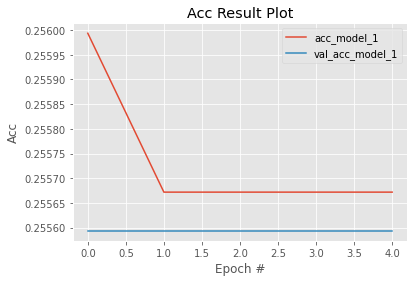

In [ ]:
#Plot hasil training model berupa hasil validasi akurasi dan Buat report klasifikasi beserta dengan keterangan labelnya
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 5), N.history["acc"], label="acc_model_1")
plt.plot(np.arange(0, 5), N.history["val_acc"], label="val_acc_model_1")
plt.title("Acc Result Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

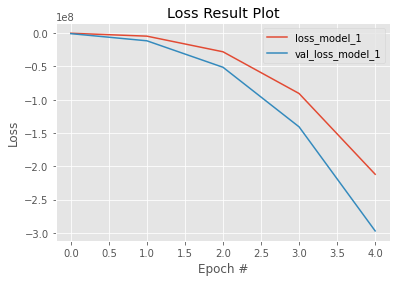

In [ ]:
#Plot hasil training model berupa hasil validasi loss dan Buat report klasifikasi beserta dengan keterangan labelnya
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 5), N.history["loss"], label="loss_model_1")
plt.plot(np.arange(0, 5), N.history["val_loss"], label="val_loss_model_1")
plt.title("Loss Result Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
#model 1
from sklearn.metrics import classification_report

pred = model1.predict(x_train)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_train, labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1612
           1       0.26      1.00      0.41      1589
           2       0.00      0.00      0.00      1408
           3       0.00      0.00      0.00      1606

    accuracy                           0.26      6215
   macro avg       0.06      0.25      0.10      6215
weighted avg       0.07      0.26      0.10      6215



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
